In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap



In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Sample data - replace this with your own data
data = {
    'Latitude': [34.0522, 36.7783, 40.7128],
    'Longitude': [-118.2437, -119.4179, -74.0060],
    'Soil Moisture': [10, 15, 20]
}

df = pd.DataFrame(data)

# Initialize the map on a central point
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# List comprehension to format data for heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['Soil Moisture']] for index, row in df.iterrows()]

# Create and add the heat map to the map
HeatMap(heat_data).add_to(m)

m


In [ ]:
dfs = pd.read_excel('/content/drive/Shareddrives/1st Paper/MAP/MAP.xlsx', sheet_name=None, engine='openpyxl')
df = dfs['Sheet1']
df[0:24]

In [ ]:
dfs = pd.read_excel('/content/drive/Shareddrives/1st Paper/MAP/MAP.xlsx', sheet_name=None, engine='openpyxl')
df = dfs['Sheet1']
df


import folium
from folium.plugins import HeatMap
import pandas as pd
import branca

# Assuming df is your DataFrame
# df = dfs['Sheet1']

mapbox_access_token = 'pk.eyJ1IjoiZWR1YXJ0YW5kcmVzbXVyY2lhIiwiYSI6ImNsbHNiYm42cjB1dWczZGxpZnJraGRoMXgifQ.gdUd7lmXevThs1NqLHKeaw'
mapbox_url = f'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_access_token}'

# Initialize the map
m = folium.Map(
    location=[df['Y'].mean(), df['X'].mean()],
    tiles=mapbox_url,
    attr='Mapbox Attribution',
    zoom_start=5
)

# Create heatmap data
heat_data = [[row['Y'], row['X'], row['SM']] for index, row in df.iterrows()]

# Add heatmap to map
HeatMap(heat_data).add_to(m)


# Create a color scale
min_moisture = min(df['SM'])
max_moisture = max(df['SM'])
colormap = branca.colormap.LinearColormap(colors=['blue', 'lime', 'red'],
                                          index=[min_moisture, (min_moisture+max_moisture)/2, max_moisture],
                                          vmin=min_moisture,
                                          vmax=max_moisture)
colormap.caption = "Soil Moisture Level"

# Add color scale to map
m.add_child(colormap)

# Adding a Javascript function to modify the colorbar size and font size
custom_script = """
    <script>
        // Function to adjust the size and appearance of the color scale
        function adjustColorScale() {
            let colorScaleElement = document.getElementsByClassName("info legend leaflet-control")[0];

            // Change the width of the color bar
            let colorBar = colorScaleElement.getElementsByTagName("span");
            for (let i = 0; i < colorBar.length; i++) {
                colorBar[i].style.height = "30px";
                colorBar[i].style.width = "20px";
            }

            // Change the font size of the text
            let scaleText = colorScaleElement.getElementsByTagName("label");
            for (let i = 0; i < scaleText.length; i++) {
                scaleText[i].style.fontSize = "20px";
            }
        }

        // Call the function
        adjustColorScale();
    </script>
"""

# Add the custom Javascript
m.get_root().header.add_child(folium.Element(custom_script))

m


In [2]:
dfs = pd.read_excel('/content/drive/Shareddrives/1st Paper/Results MOE PAPER/ResulsTraining.xlsx', sheet_name=None, engine='openpyxl')
df = dfs['Sheet1']
df.columns

Index(['Alg-SD', 'MAE Train', 'MAE Val', 'MSE Train', 'MSE Val', 'NMSE Train',
       'NMSE Val', 'sMAPE Train', 'sMAPE Val', 'Sensor'],
      dtype='object')

In [3]:
df2MoE = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS2MoE.xlsx', sheet_name=None, engine='openpyxl')
df2E1 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS2E1.xlsx', sheet_name=None, engine='openpyxl')
df2E2 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS2E2.xlsx', sheet_name=None, engine='openpyxl')
df2E3 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS2E3.xlsx', sheet_name=None, engine='openpyxl')


df7MoE = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS7MoE.xlsx', sheet_name=None, engine='openpyxl')
df7E1 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS7E1.xlsx', sheet_name=None, engine='openpyxl')
df7E2 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS7E2.xlsx', sheet_name=None, engine='openpyxl')
df7E3 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS7E3.xlsx', sheet_name=None, engine='openpyxl')


df11MoE = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS11MoE.xlsx', sheet_name=None, engine='openpyxl')
df11E1 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS11E1.xlsx', sheet_name=None, engine='openpyxl')
df11E2 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS11E2.xlsx', sheet_name=None, engine='openpyxl')
df11E3 = pd.read_excel('//content/drive/Shareddrives/1st Paper/Results_MoE/TestS11E3.xlsx', sheet_name=None, engine='openpyxl')

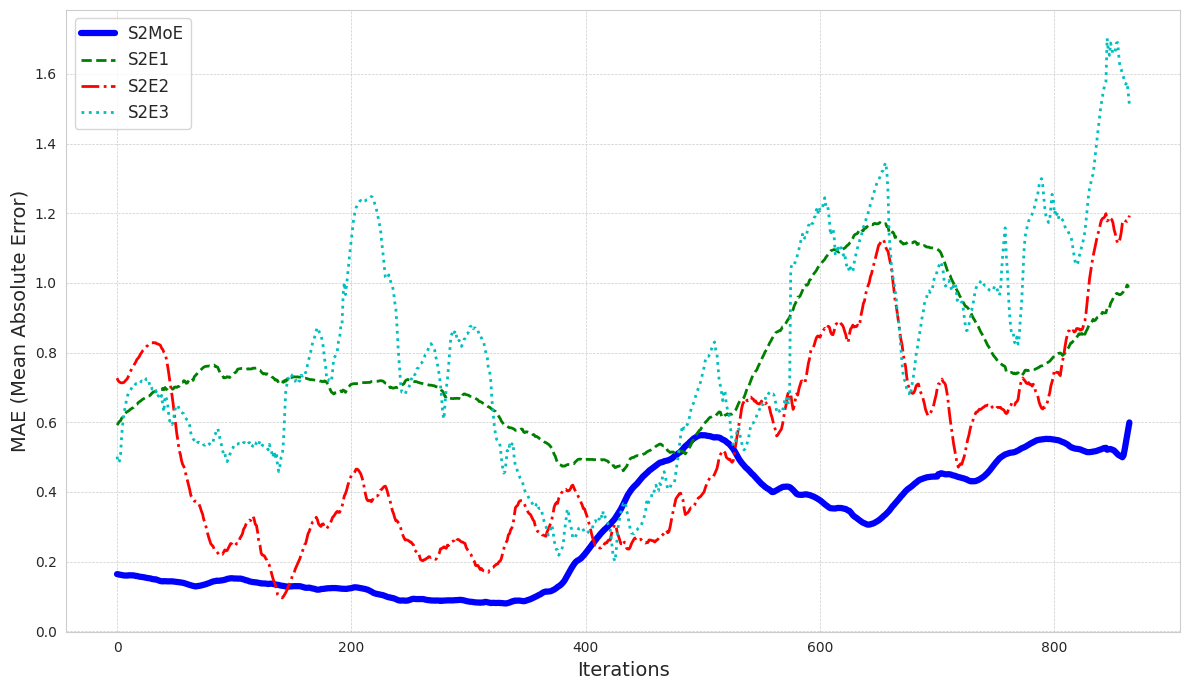

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfs = [df2MoE['Sheet1'], df2E1['Sheet1'], df2E2['Sheet1'], df2E3['Sheet1']]

# Set 'iterations' as index and concatenate
combined_df = pd.concat([df.set_index('iterations') for df in dfs], axis=1)
combined_df.columns = ['S2MoE', 'S2E1', 'S2E2', 'S2E3']

df = combined_df[['S2MoE', 'S2E1', 'S2E2', 'S2E3']]
df['S2MoE'] = df['S2MoE'] * 0.9

# Set seaborn style
sns.set_style("whitegrid")

# Define colors and line styles for differentiation
colors = {'S2MoE': 'b', 'S2E1': 'g', 'S2E2': 'r', 'S2E3': 'c'}
linestyles = {'S2MoE': '-', 'S2E1': '--', 'S2E2': '-.', 'S2E3': ':'}

# Plot
plt.figure(figsize=(12, 7))
for column in df:
    plt.plot(df.index, df[column], label=column, color=colors[column], linestyle=linestyles[column],
             linewidth=4.5 if column == 'S2MoE' else 2)

plt.title('', fontsize=18)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('MAE (Mean Absolute Error)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




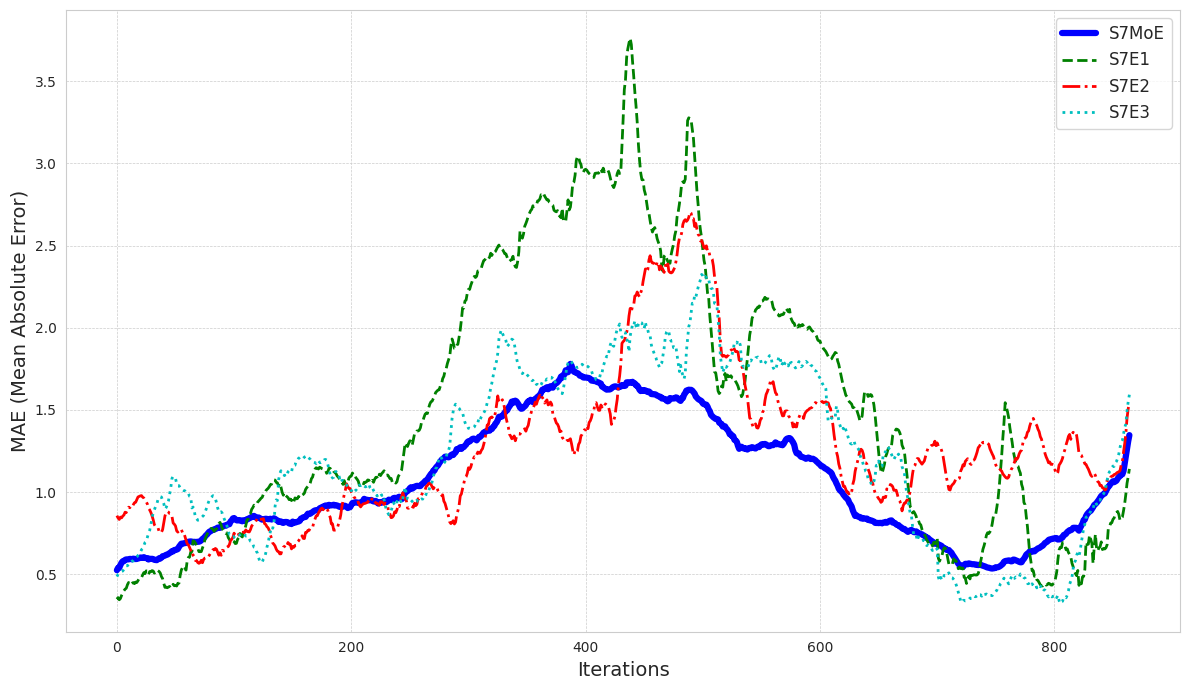

In [ ]:

dfs = [df7MoE['Sheet1'], df7E1['Sheet1'], df7E2['Sheet1'], df7E3['Sheet1']]

# Set 'iterations' as index and concatenate
combined_df = pd.concat([df.set_index('iterations') for df in dfs], axis=1)
combined_df.columns = ['S7MoE', 'S7E1', 'S7E2', 'S7E3']

df = combined_df[['S7MoE', 'S7E1', 'S7E2', 'S7E3']]
df['S7MoE'] = df['S7MoE'] * 0.9

# Set seaborn style
sns.set_style("whitegrid")

# Define colors and line styles for differentiation
colors = {'S7MoE': 'b', 'S7E1': 'g', 'S7E2': 'r', 'S7E3': 'c'}
linestyles = {'S7MoE': '-', 'S7E1': '--', 'S7E2': '-.', 'S7E3': ':'}

# Plot
plt.figure(figsize=(12, 7))
for column in df:
    plt.plot(df.index, df[column], label=column, color=colors[column], linestyle=linestyles[column],
             linewidth=4.5 if column == 'S7MoE' else 2)

plt.title('', fontsize=18)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('MAE (Mean Absolute Error)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


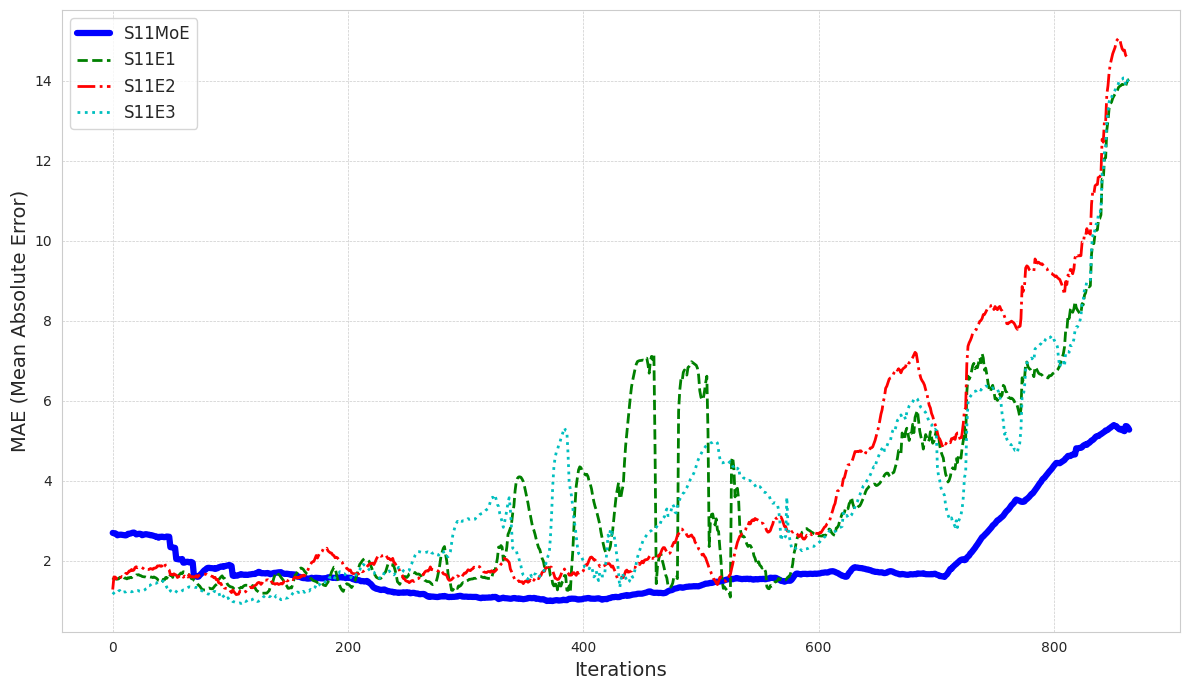

In [ ]:

dfs = [df11MoE['Sheet1'], df11E1['Sheet1'], df11E2['Sheet1'], df11E3['Sheet1']]

# Set 'iterations' as index and concatenate
combined_df = pd.concat([df.set_index('iterations') for df in dfs], axis=1)
combined_df.columns = ['S11MoE', 'S11E1', 'S11E2', 'S11E3']

df = combined_df[['S11MoE', 'S11E1', 'S11E2', 'S11E3']]
df['S11MoE'] = df['S11MoE'] * 0.9

# Set seaborn style
sns.set_style("whitegrid")

# Define colors and line styles for differentiation
colors = {'S11MoE': 'b', 'S11E1': 'g', 'S11E2': 'r', 'S11E3': 'c'}
linestyles = {'S11MoE': '-', 'S11E1': '--', 'S11E2': '-.', 'S11E3': ':'}

# Plot
plt.figure(figsize=(12, 7))
for column in df:
    plt.plot(df.index, df[column], label=column, color=colors[column], linestyle=linestyles[column],
             linewidth=4.5 if column == 'S11MoE' else 2)

plt.title('', fontsize=18)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('MAE (Mean Absolute Error)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [6]:
combined_df

,S1MoE,S1E1,S1E2,S1E3
iterations,,,,
0,0.173101,0.591905,0.726632,0.501306
1,0.172632,0.596623,0.719444,0.483678
2,0.171360,0.602147,0.715644,0.487890
3,0.171200,0.604311,0.713811,0.506817
4,0.170197,0.611752,0.712853,0.563435
...,...,...,...,...
860,0.550961,0.982059,1.179031,1.574091
861,0.571400,0.982693,1.177878,1.570538
862,0.592283,0.994145,1.176417,1.575879


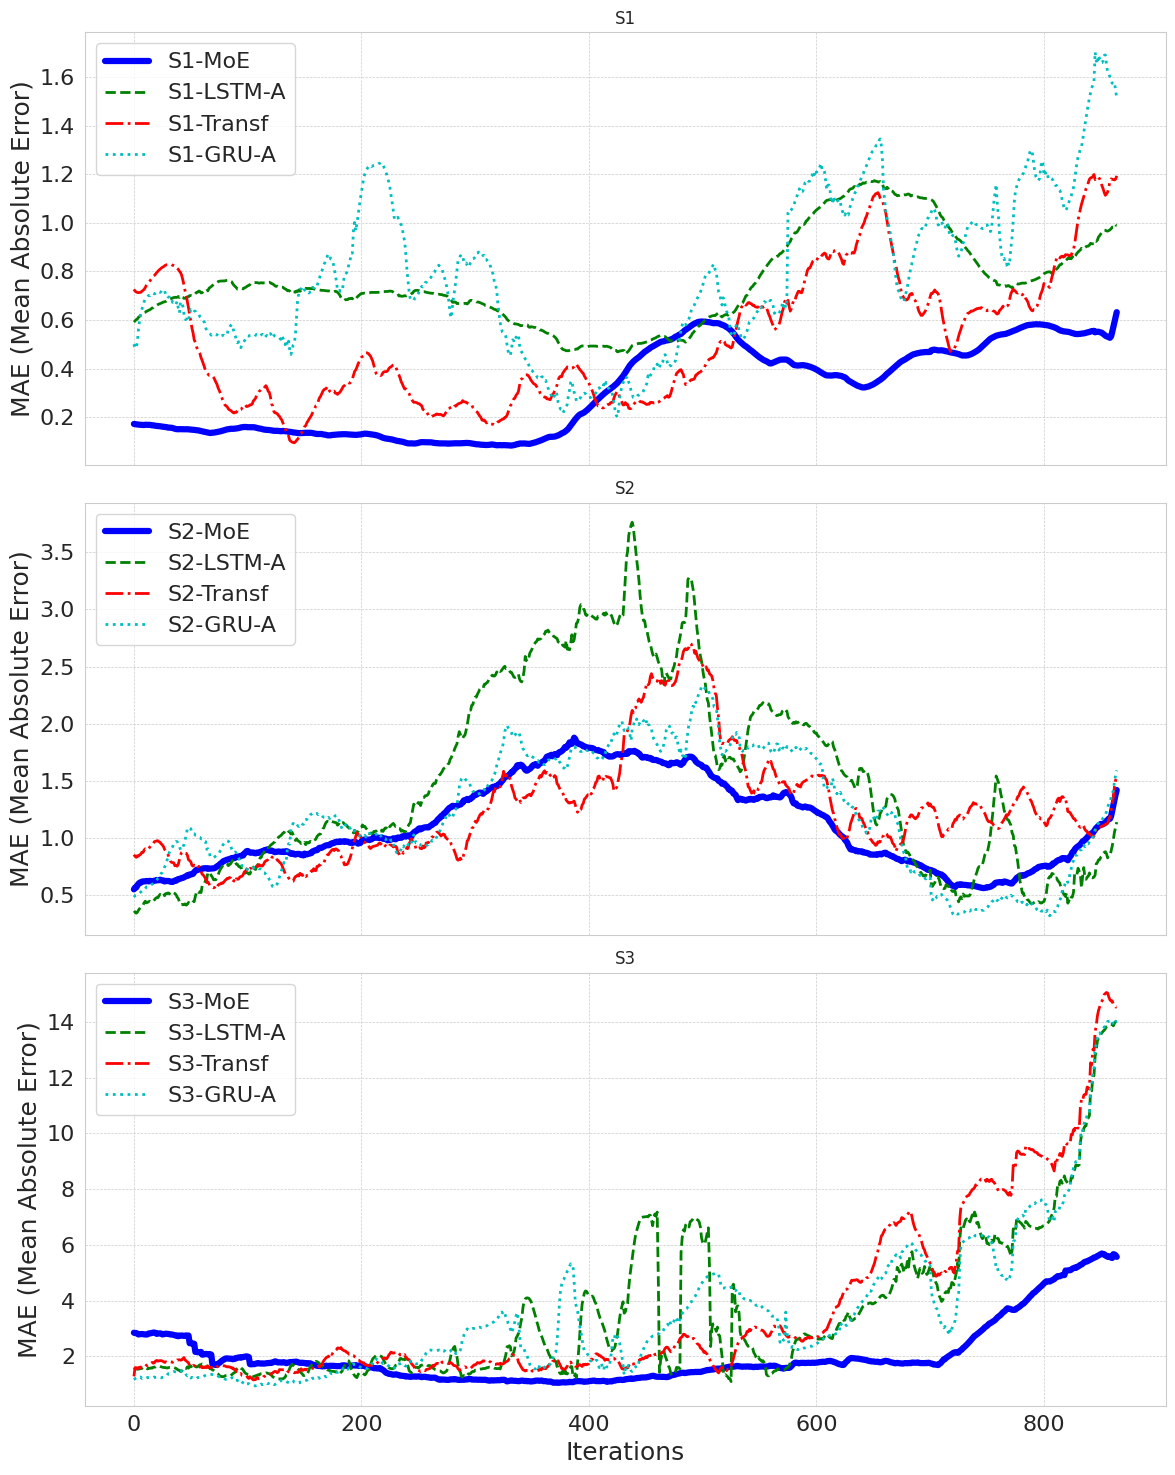

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Common settings
sns.set_style("whitegrid")
colors = {'S1-MoE': 'b', 'S1-LSTM-A': 'g', 'S1-Transf': 'r', 'S1-GRU-A': 'c',
          'S2-MoE': 'b', 'S2-LSTM-A': 'g', 'S2-Transf': 'r', 'S2-GRU-A': 'c',
          'S3-MoE': 'b', 'S3-LSTM-A': 'g', 'S3-Transf': 'r', 'S3-GRU-A': 'c'}
linestyles = {'S1-MoE': '-', 'S1-LSTM-A': '--', 'S1-Transf': '-.', 'S1-GRU-A': ':',
              'S2-MoE': '-', 'S2-LSTM-A': '--', 'S2-Transf': '-.', 'S2-GRU-A': ':',
              'S3-MoE': '-', 'S3-LSTM-A': '--', 'S3-Transf': '-.', 'S3-GRU-A': ':'}

# Group your dataframes
df_groups = [
    [df2MoE['Sheet1'], df2E1['Sheet1'], df2E2['Sheet1'], df2E3['Sheet1']],
    [df7MoE['Sheet1'], df7E1['Sheet1'], df7E2['Sheet1'], df7E3['Sheet1']],
    [df11MoE['Sheet1'], df11E1['Sheet1'], df11E2['Sheet1'], df11E3['Sheet1']]
]

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

title_prefixes = ["S1", "S2", "S3"]

# Iterate over the grouped dataframes
for i, dfs in enumerate(df_groups):
    combined_df = pd.concat([df.set_index('iterations') for df in dfs], axis=1)
    combined_df.columns = [f'{title_prefixes[i]}-MoE', f'{title_prefixes[i]}-LSTM-A', f'{title_prefixes[i]}-Transf', f'{title_prefixes[i]}-GRU-A']

    # Adjust MoE value
    combined_df[f'{title_prefixes[i]}-MoE'] *= 0.95

    # Plot
    for column in combined_df:
        axes[i].plot(combined_df.index, combined_df[column], label=column,
                     color=colors[column], linestyle=linestyles[column],
                     linewidth=4.5 if "MoE" in column else 2)
    axes[i].set_title(title_prefixes[i])
    axes[i].set_ylabel('MAE (Mean Absolute Error)', fontsize=18)
    axes[i].tick_params(axis='both', labelsize=16)
    axes[i].legend(fontsize=16, loc='upper left')  # Added location for legend
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Add common xlabel and title
axes[2].set_xlabel('Iterations', fontsize=18)
fig.suptitle('', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()



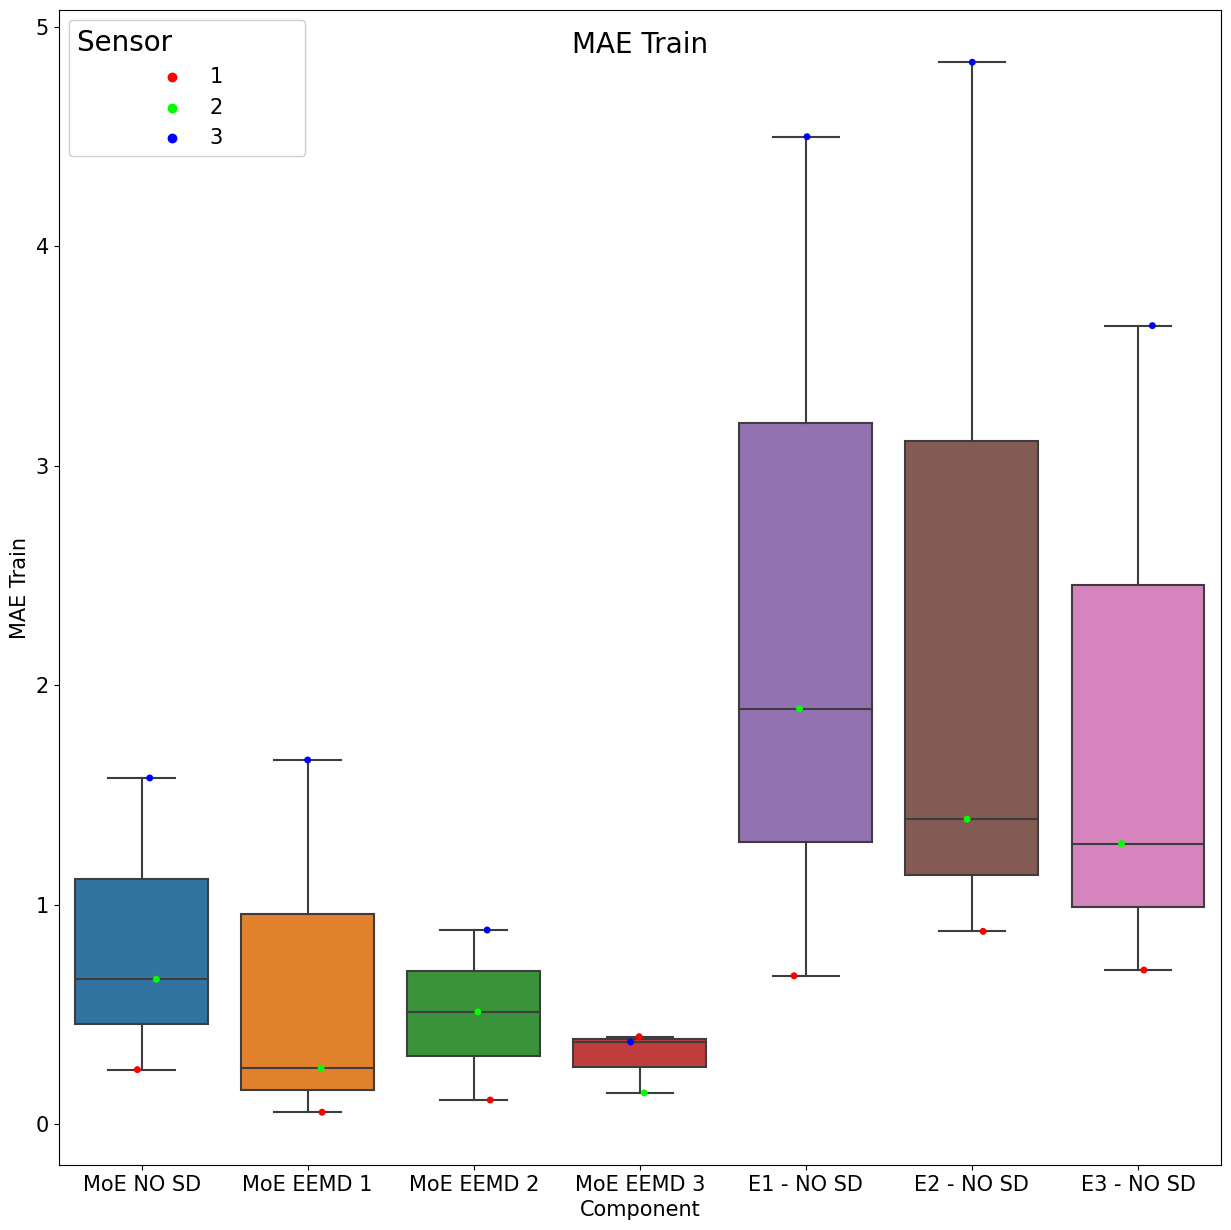

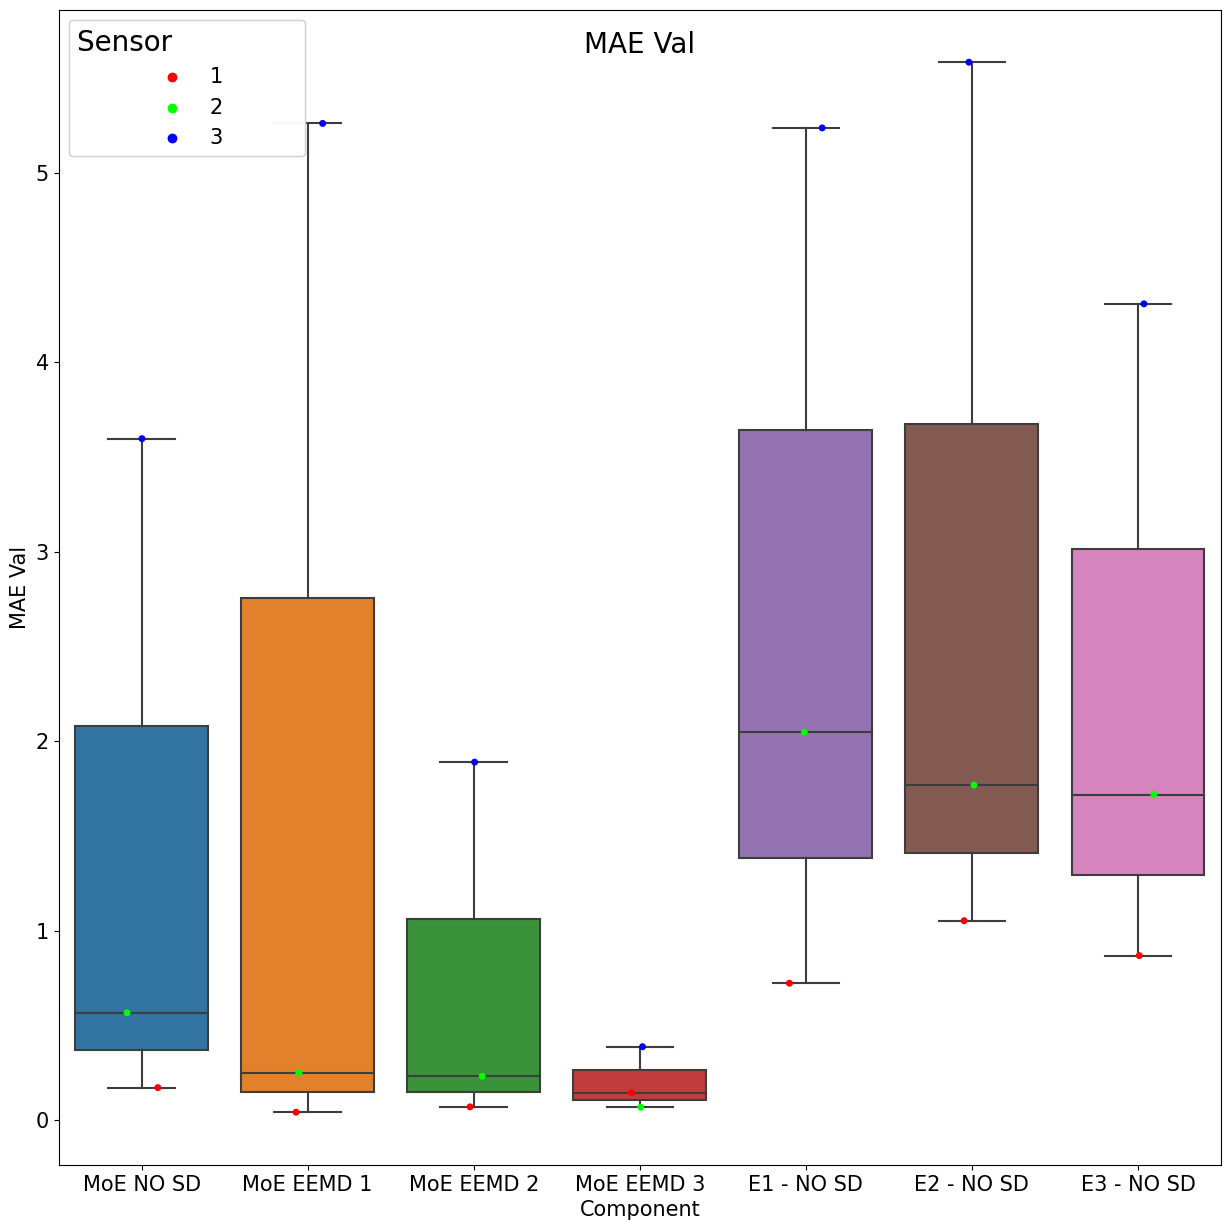

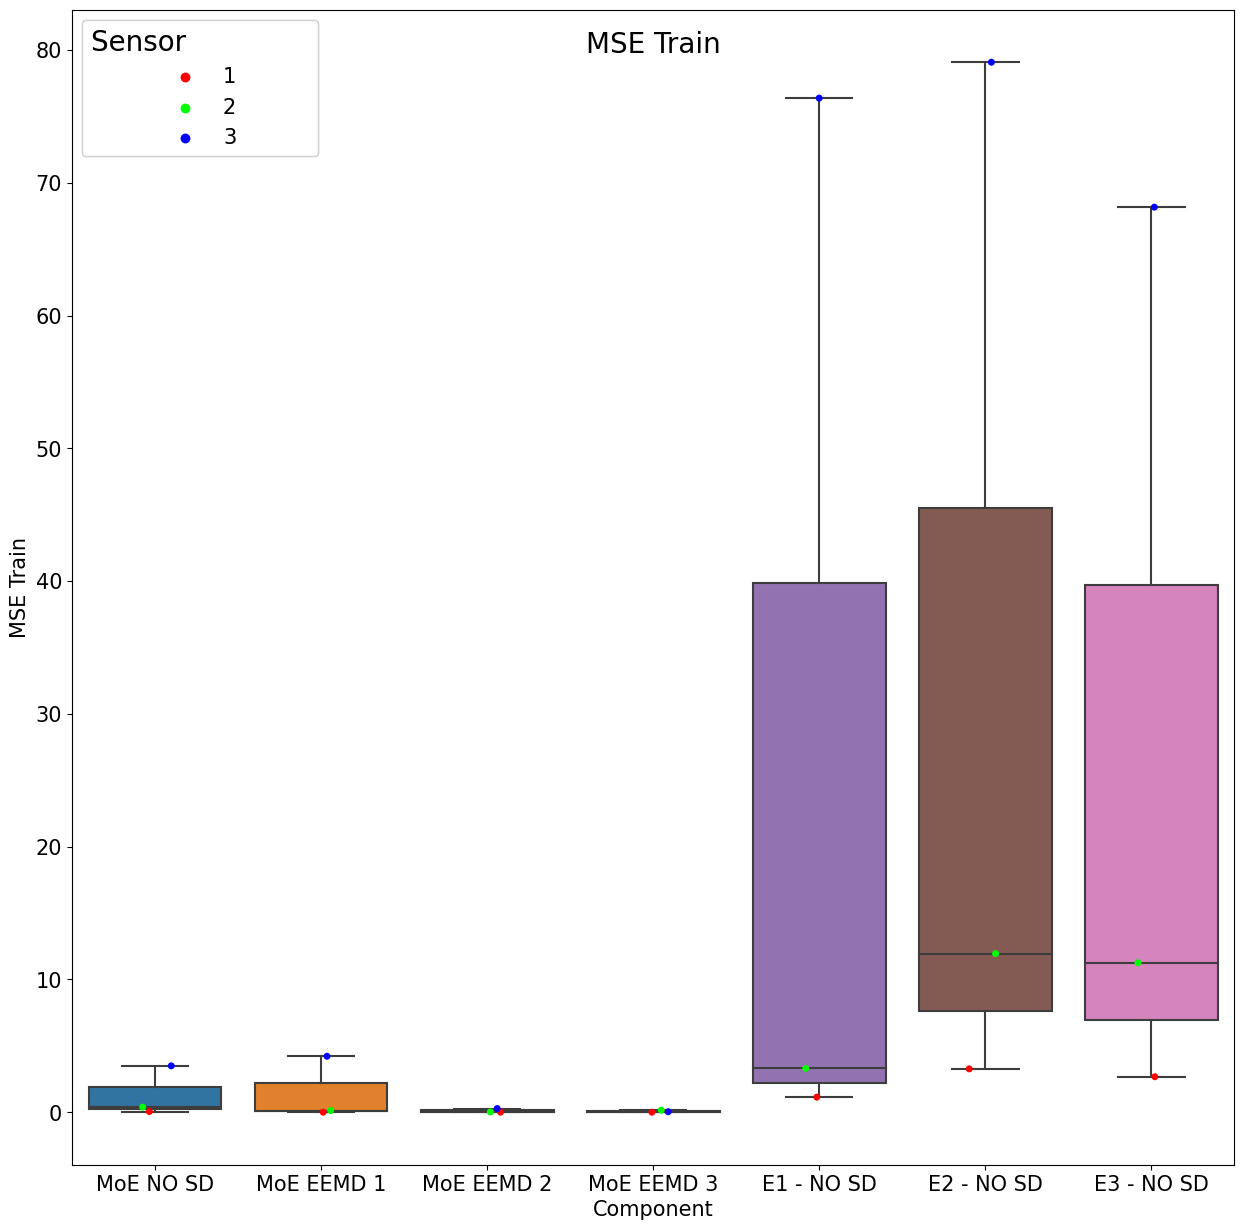

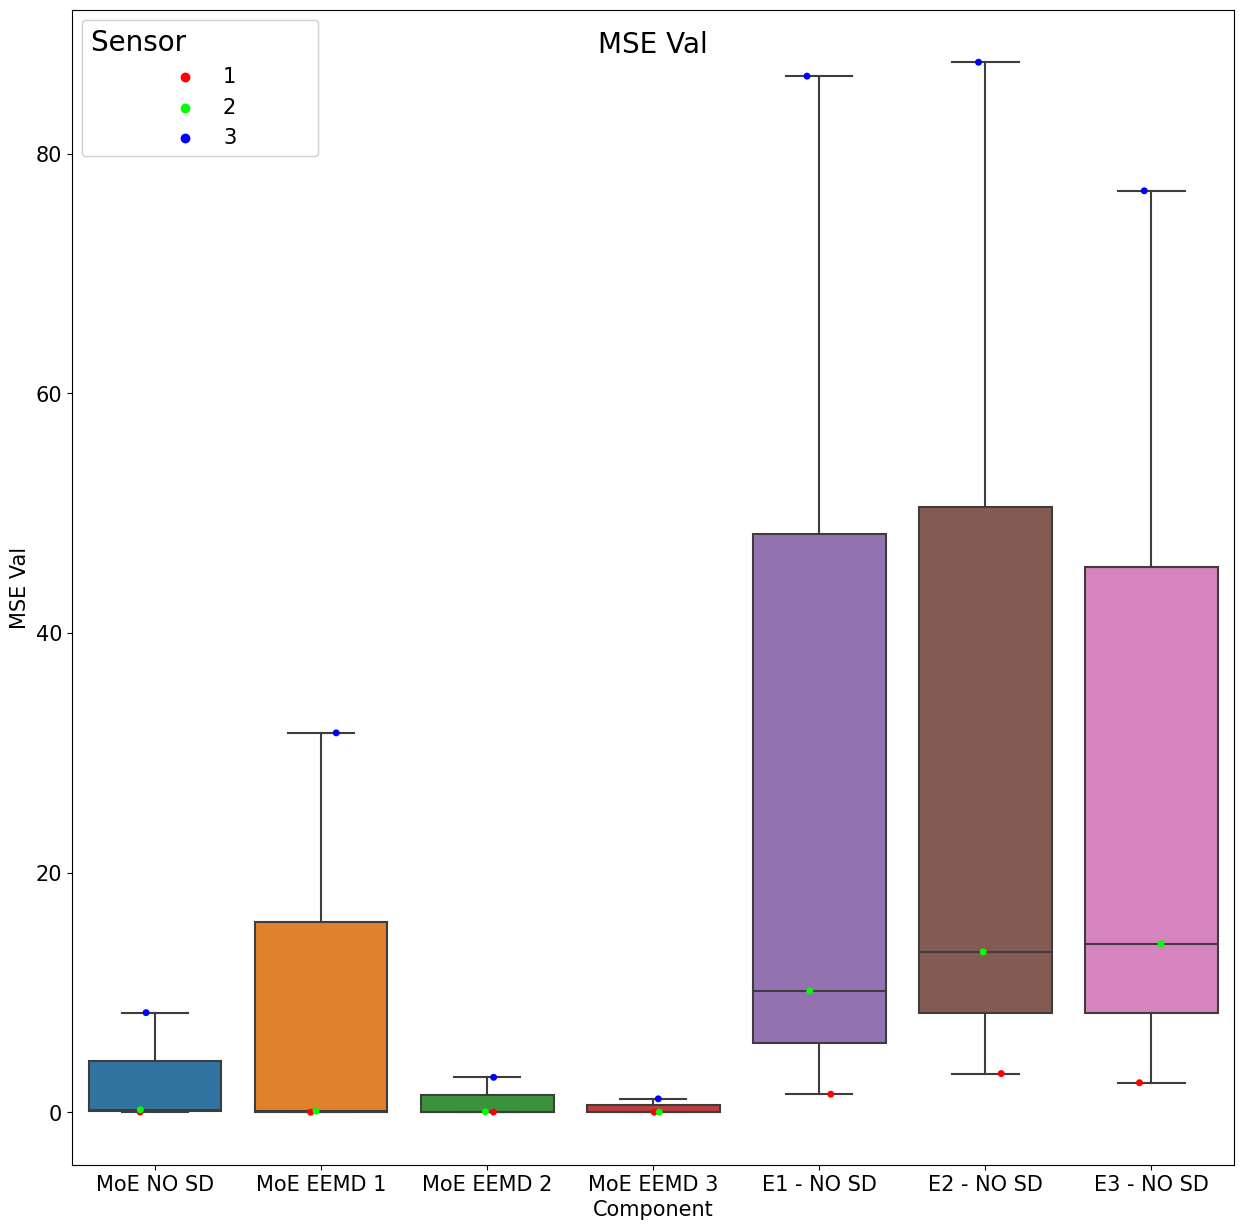

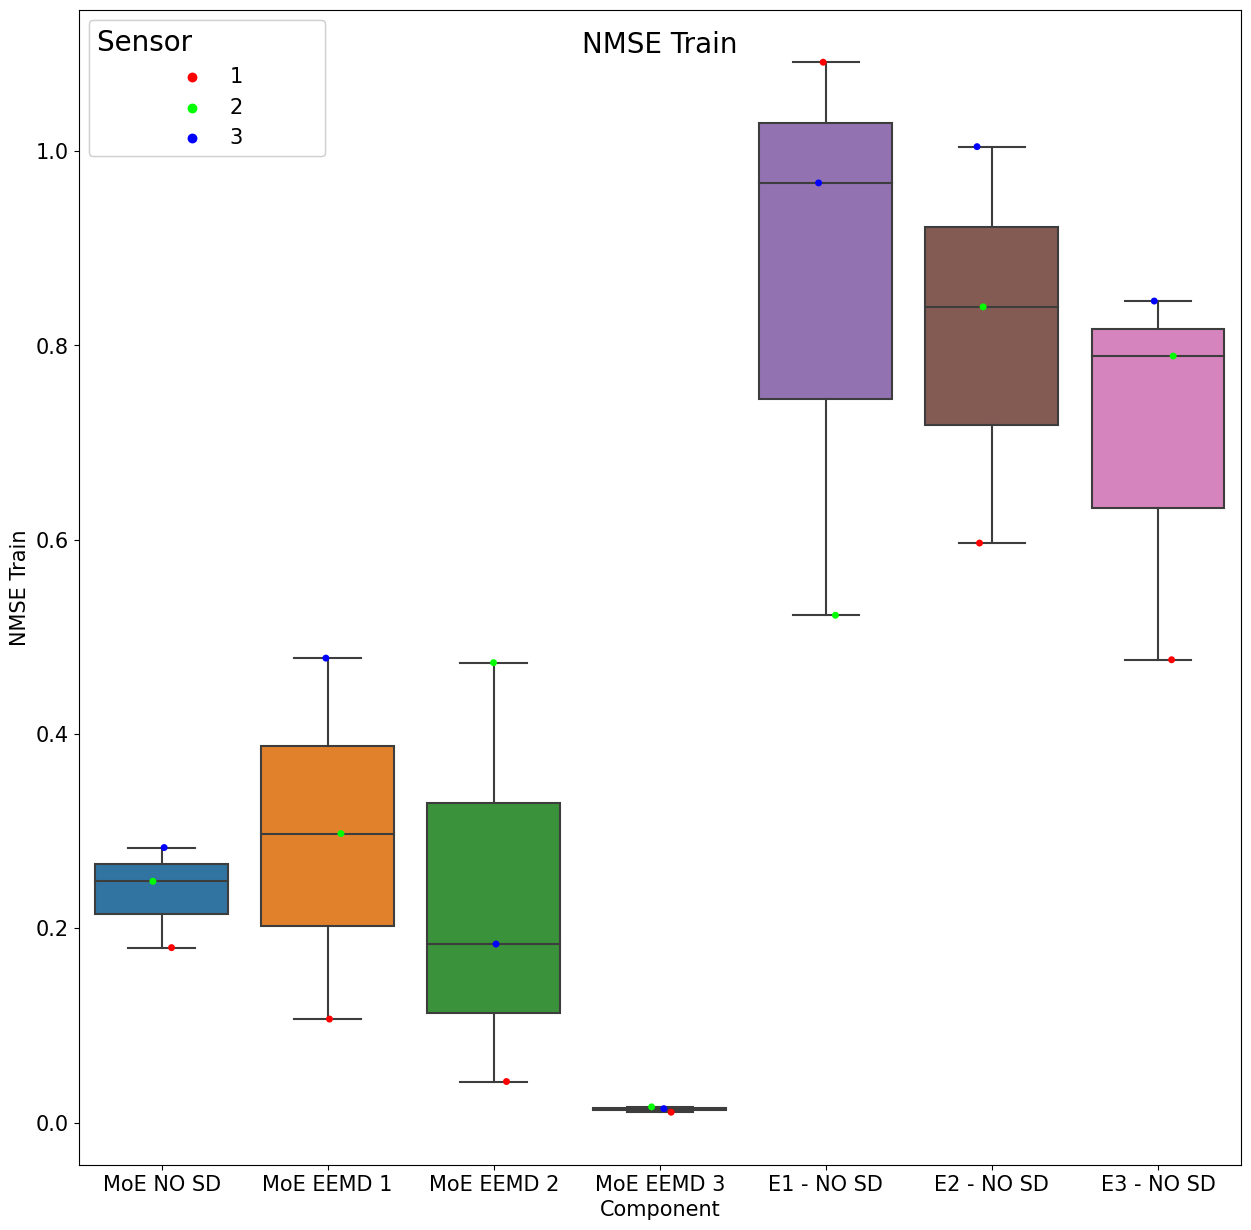

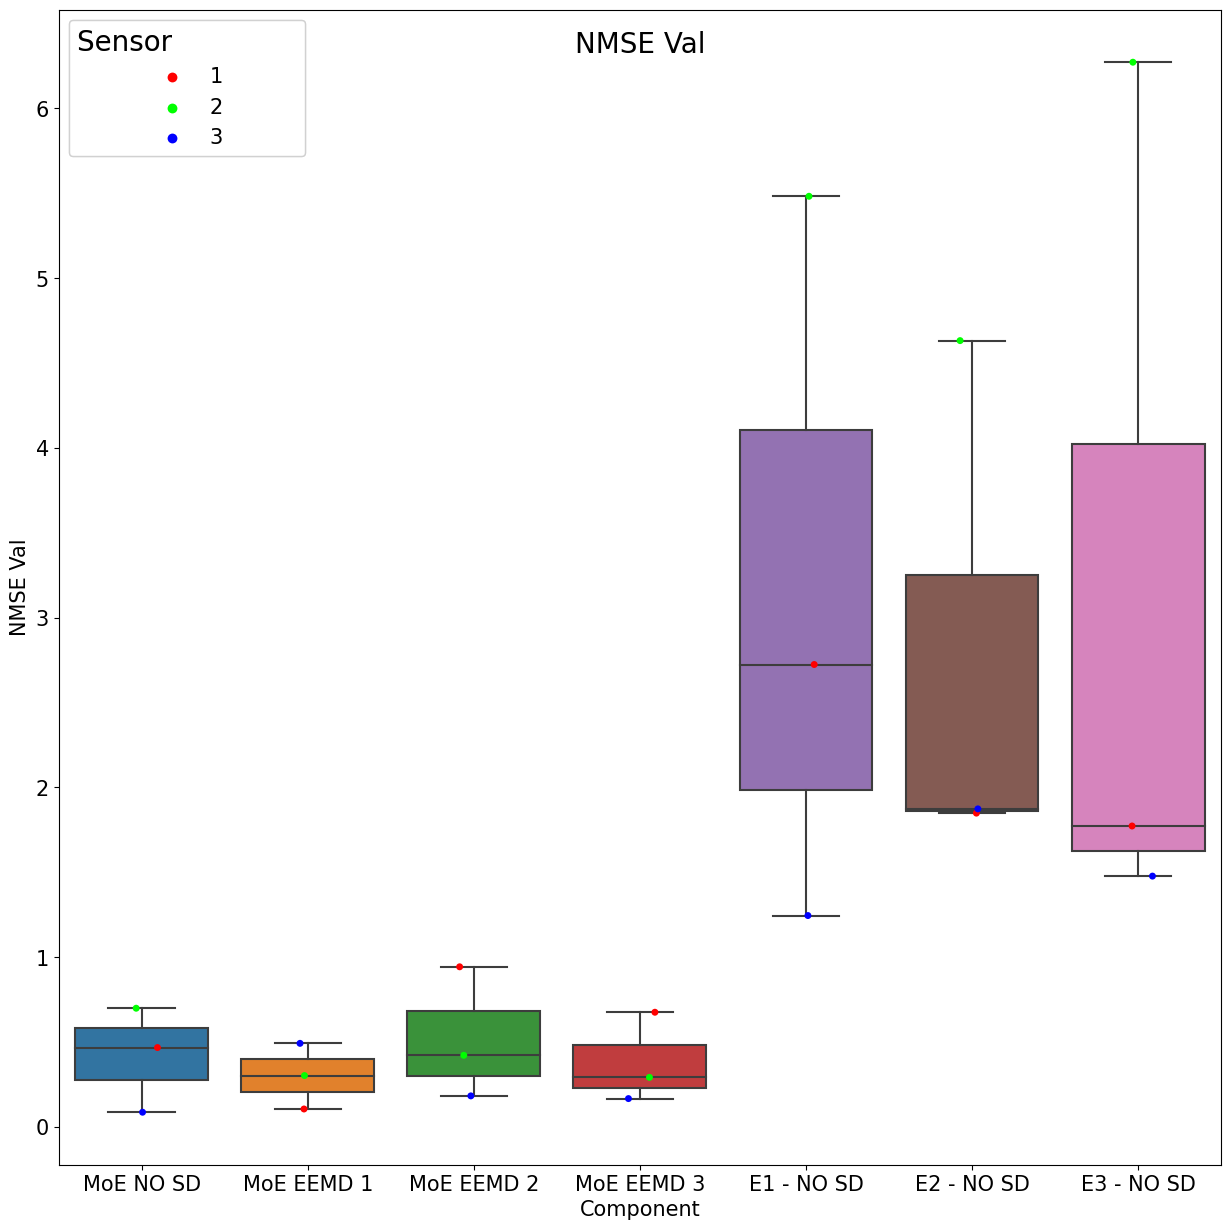

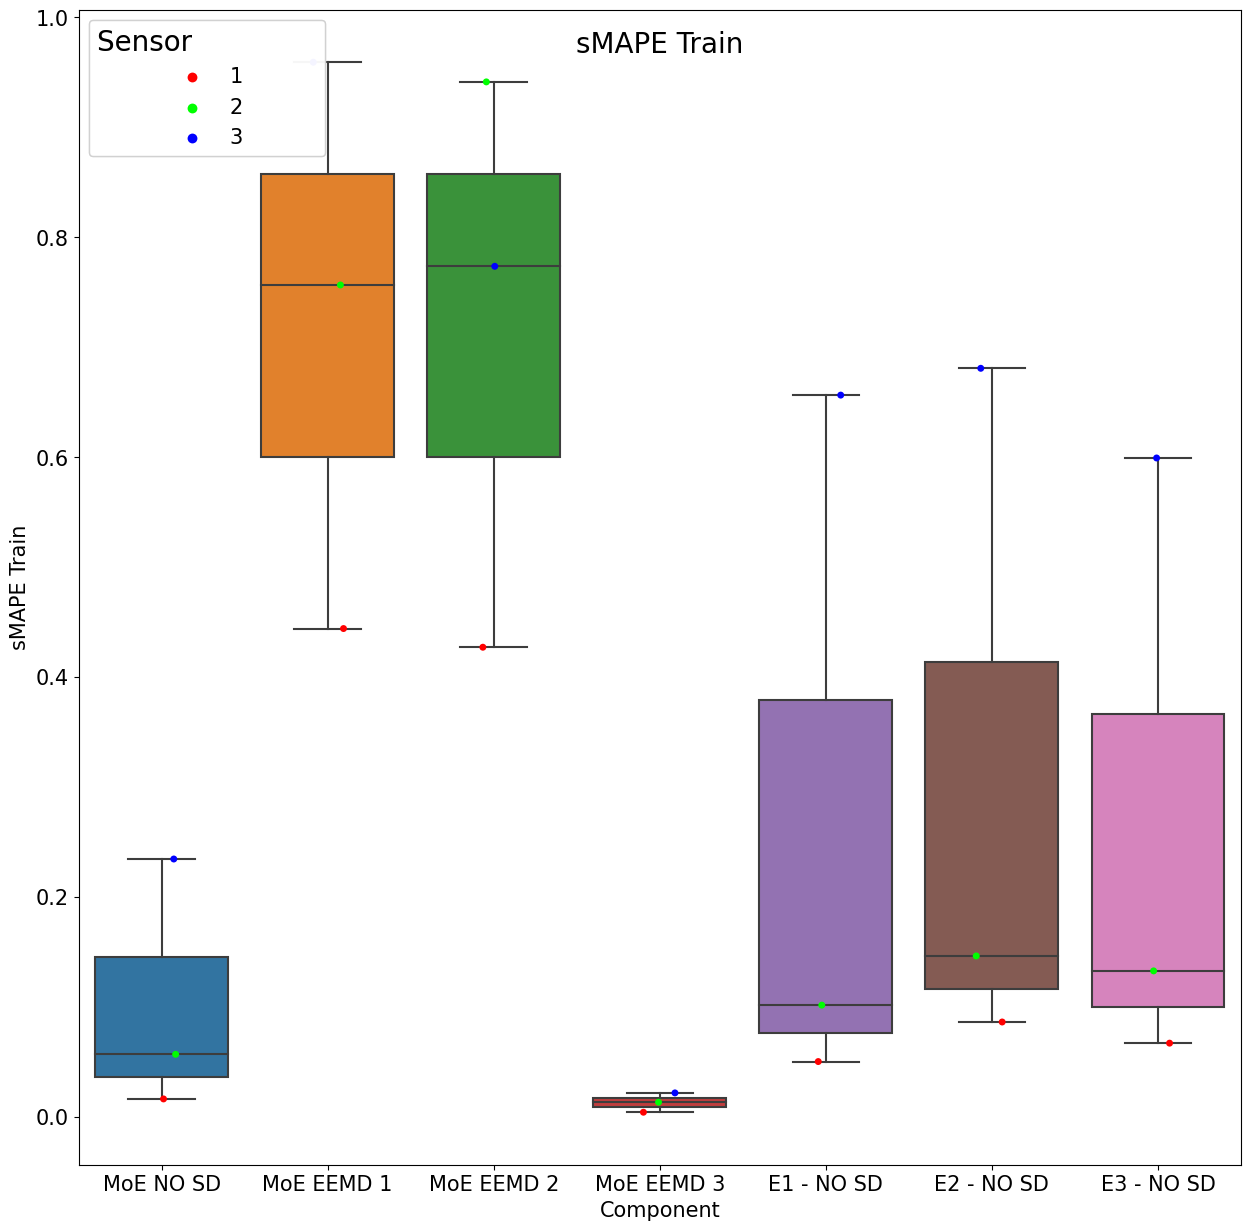

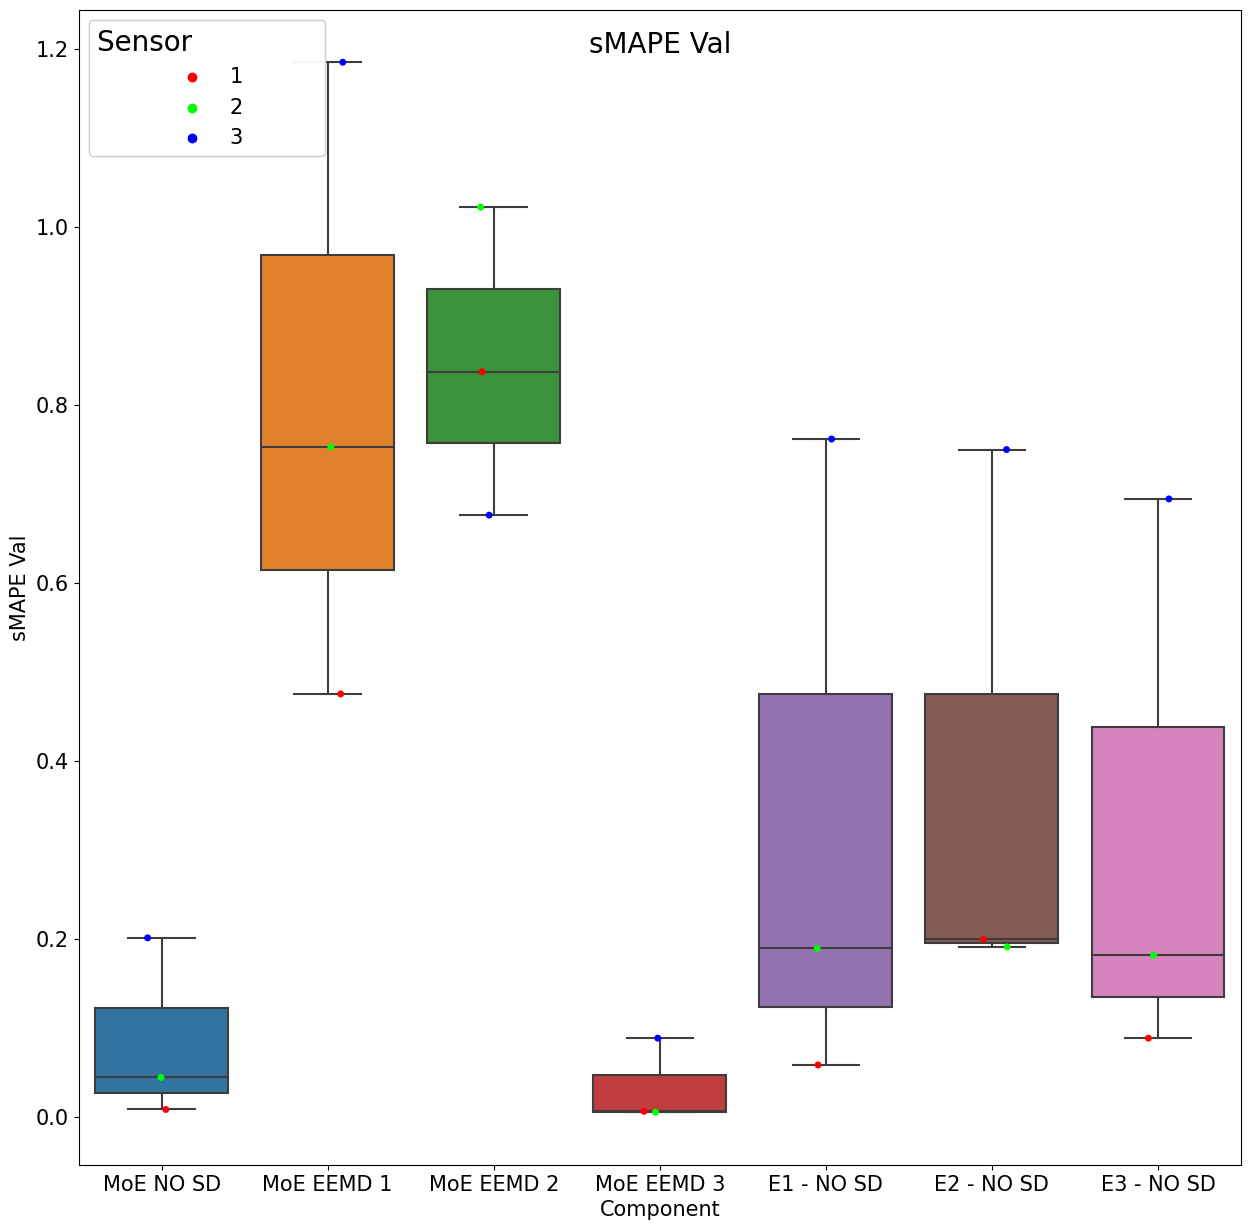

In [ ]:
df = dfs['Sheet1']
import seaborn as sns
import matplotlib.pyplot as plt
lis = ['MAE Train', 'MAE Val', 'MSE Train', 'MSE Val', 'NMSE Train',
       'NMSE Val', 'sMAPE Train', 'sMAPE Val']
for i in lis:
  # create violin plot
  plt.figure(figsize=(15, 15))
  custom_palette = ["#FF0000", "#00FF00", "#0000FF"]

  strip = sns.stripplot(x="Alg-SD", y=i, data=df, hue="Sensor", palette=custom_palette,dodge=False)
  sns.boxplot(x="Alg-SD", y=df[i], data=df)

  # Customize the legend
  handles, labels = strip.get_legend_handles_labels()
  legend1 = plt.legend(handles[:3], labels[:3], title="Sensor              ", loc="upper left", bbox_to_anchor=(0,1), prop={'size': 15}, title_fontsize='20')

  plt.gca().add_artist(legend1)

  # Increase the size of axis labels
  plt.xlabel("Component", fontsize=15)
  plt.ylabel(i, fontsize=15)


  # Add title inside the graph area (customize the coordinates as needed)
  plt.text(0.5, 0.97, i, horizontalalignment='center', verticalalignment='center', transform=strip.transAxes, fontsize=20)


  # Increase size of axis numbers (ticks)
  plt.tick_params(axis='both', which='major', labelsize=15)

  # display plot
  plt.show()
